In [18]:
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 3.7 MB/s eta 0:00:0000:0100:01


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Verify SciPy is installed
try:
    import scipy
    print("SciPy version:", scipy.__version__)
except ImportError:
    raise ImportError("SciPy is required for ImageDataGenerator. Install it with: pip install scipy")

# Step 1: Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Verify data shapes
print("Training data shape:", train_images.shape)  # Should be (50000, 32, 32, 3)
print("Test data shape:", test_images.shape)      # Should be (10000, 32, 32, 3)
print("Training labels shape:", train_labels.shape)  # Should be (50000, 1)
print("Max pixel value:", train_images.max())     # Should be 1.0

# Step 2: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,        # Random rotations up to 15 degrees
    width_shift_range=0.1,   # Random horizontal shifts up to 10%
    height_shift_range=0.1,  # Random vertical shifts up to 10%
    horizontal_flip=True,     # Random horizontal flips
    zoom_range=0.1           # Random zoom up to 10%
)
datagen.fit(train_images)

# Step 3: Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model with augmentation and increased epochs
print("Starting training...")
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=20,  # Increased from 10 to 20
                    validation_data=(test_images, test_labels))

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Step 7: Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# # Accuracy Plot
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# # Loss Plot
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()


2025-05-27 12:32:59.493621: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-27 12:32:59.496589: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-27 12:32:59.565395: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-27 12:32:59.591576: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748329379.643980     432 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748329379.65

SciPy version: 1.15.3
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (50000, 1)
Max pixel value: 1.0
Starting training...
Epoch 1/20


/home/drackko/miniconda3/envs/cnn/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1748329384.589477     432 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1748329384.592783     432 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/drackko/miniconda3/envs/c

782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 56ms/step - accuracy: 0.2799 - loss: 1.9313 - val_accuracy: 0.5124 - val_loss: 1.3575
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.4784 - loss: 1.4483 - val_accuracy: 0.5820 - val_loss: 1.1624
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.5363 - loss: 1.3036 - val_accuracy: 0.6001 - val_loss: 1.1295
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.5722 - loss: 1.2080 - val_accuracy: 0.6270 - val_loss: 1.0461
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.5966 - loss: 1.1471 - val_accuracy: 0.6545 - val_loss: 0.9983
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.6226 - loss: 1.0801 - val_accuracy: 0.6813 - val_loss: 0.9100
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.6350 - loss: 1.0425 - val_accuracy: 0.7032 - val_loss: 0.8715
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.6441 - loss: 1.0159 - val_accurac

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [23]:
model.save('cifar10_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


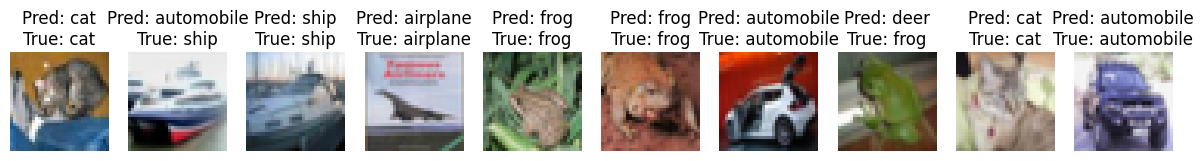

In [22]:
num_samples = 10
predictions = model.predict(test_images[:num_samples])
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(test_images[i])
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i][0]
    plt.title(f"Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}")
    plt.axis('off')
plt.show()